In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Generate data
np.random.seed(45)
num_samples = 40

x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3 * x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

In [9]:
# Convert data to tensors
x_tensor = torch.tensor(x1, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Define initial parameters (θ1, θ0)
theta_1 = torch.tensor([1.0], requires_grad=True)  # θ1
theta_0 = torch.tensor([1.0], requires_grad=True)  # θ0

# Linear regression model: θ1 * x + θ0
def model(x):
    return theta_1 * x + theta_0

# Mean Squared Error loss function
def mse_loss(pred, target):
    return torch.mean((pred - target) ** 2)

# Forward pass: compute predictions and loss
predictions = model(x_tensor)
loss = mse_loss(predictions, y_tensor)

# Backward pass: compute gradients
loss.backward()

# Print the gradients
print(f"Gradient with respect to theta_0: {theta_0.grad}")
print(f"Gradient with respect to theta_1: {theta_1.grad}")

Gradient with respect to theta_0: tensor([-5.6164])
Gradient with respect to theta_1: tensor([-0.5630])


In [10]:
true_grad_theta_1 = theta_1.grad.item()
true_grad_theta_0 = theta_0.grad.item()

# Clear gradients for stochastic gradient calculation
theta_1.grad.zero_()
theta_0.grad.zero_()

# Lists to store stochastic gradients
stochastic_grad_theta_1 = []
stochastic_grad_theta_0 = []

# Calculate stochastic gradients for each data point
for i in range(num_samples):
    # Forward pass for a single point
    pred = model(x_tensor[i])
    loss = mse_loss(pred, y_tensor[i])

    # Backward pass for a single point
    loss.backward()

    # Store the gradients for this data point
    stochastic_grad_theta_1.append(theta_1.grad.item())
    stochastic_grad_theta_0.append(theta_0.grad.item())

    # Clear gradients after each backward pass
    theta_1.grad.zero_()
    theta_0.grad.zero_()

# Compute the average stochastic gradient
avg_grad_theta_1 = np.mean(stochastic_grad_theta_1)
avg_grad_theta_0 = np.mean(stochastic_grad_theta_0)

# Display results
print(f"True Gradient w.r.t θ1: {true_grad_theta_1}")
print(f"True Gradient w.r.t θ0: {true_grad_theta_0}\n")

print(f"Average Stochastic Gradient w.r.t θ1: {avg_grad_theta_1}")
print(f"Average Stochastic Gradient w.r.t θ0: {avg_grad_theta_0}")

True Gradient w.r.t θ1: -0.5629974603652954
True Gradient w.r.t θ0: -5.616434097290039

Average Stochastic Gradient w.r.t θ1: -0.5629974469542504
Average Stochastic Gradient w.r.t θ0: -5.616434770822525


In [12]:
learning_rate = 0.1
epsilon = 0.001
num_epochs = 15
batch_size = 8

def model(x, theta_1, theta_0):
    return theta_1 * x + theta_0

loss_fn = torch.nn.MSELoss()

In [13]:
# Gradient Descent functions
def full_batch_gd(theta_1, theta_0):
    for epoch in range(num_epochs):
        # Forward pass for all data
        pred = model(x_tensor, theta_1, theta_0)
        loss = loss_fn(pred, y_tensor)
        
        # Backward pass to compute gradients
        loss.backward()

        # Gradient update
        with torch.no_grad():
            theta_1 -= learning_rate * theta_1.grad
            theta_0 -= learning_rate * theta_0.grad
        
        # Zero gradients
        theta_1.grad.zero_()
        theta_0.grad.zero_()
        
        yield theta_1.item(), theta_0.item(), loss.item()

In [14]:
def mini_batch_gd(theta_1, theta_0):
    for epoch in range(num_epochs):
        indices = torch.randperm(num_samples)
        for i in range(0, num_samples, batch_size):
            batch_indices = indices[i:i+batch_size]
            batch_x = x_tensor[batch_indices]
            batch_y = y_tensor[batch_indices]

            # Forward pass for batch
            pred = model(batch_x, theta_1, theta_0)
            loss = loss_fn(pred, batch_y)
            
            # Backward pass
            loss.backward()

            # Gradient update
            with torch.no_grad():
                theta_1 -= learning_rate * theta_1.grad
                theta_0 -= learning_rate * theta_0.grad

            # Zero gradients
            theta_1.grad.zero_()
            theta_0.grad.zero_()
        
        yield theta_1.item(), theta_0.item(), loss.item()

In [15]:
def sgd(theta_1, theta_0):
    for epoch in range(num_epochs):
        indices = torch.randperm(num_samples)
        for i in range(num_samples):
            idx = indices[i]
            single_x = x_tensor[idx].view(-1, 1)
            single_y = y_tensor[idx].view(-1, 1)
            
            # Forward pass for a single point
            pred = model(single_x, theta_1, theta_0)
            loss = loss_fn(pred, single_y)
            
            # Backward pass
            loss.backward()

            # Gradient update
            with torch.no_grad():
                theta_1 -= learning_rate * theta_1.grad
                theta_0 -= learning_rate * theta_0.grad

            # Zero gradients
            theta_1.grad.zero_()
            theta_0.grad.zero_()

        yield theta_1.item(), theta_0.item(), loss.item()

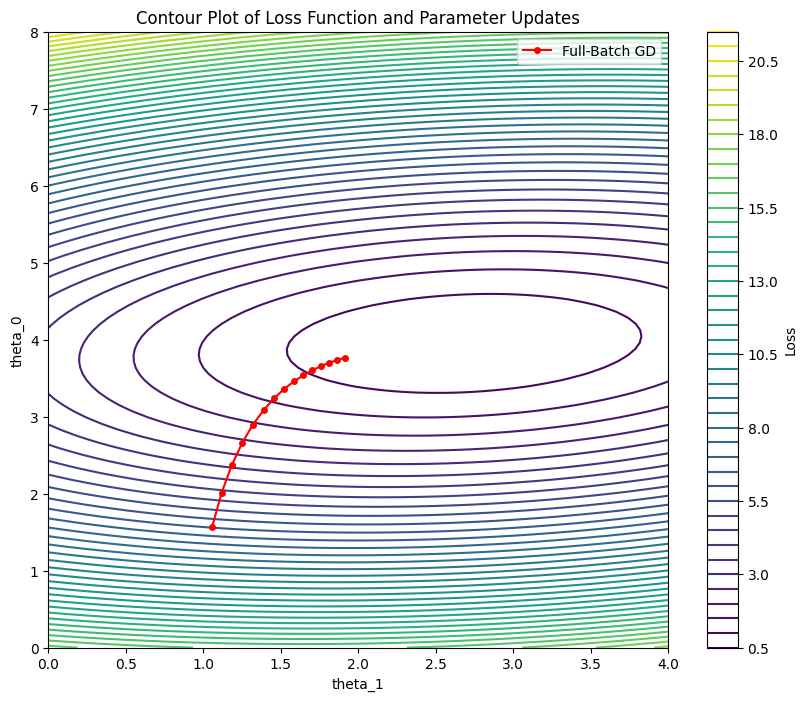

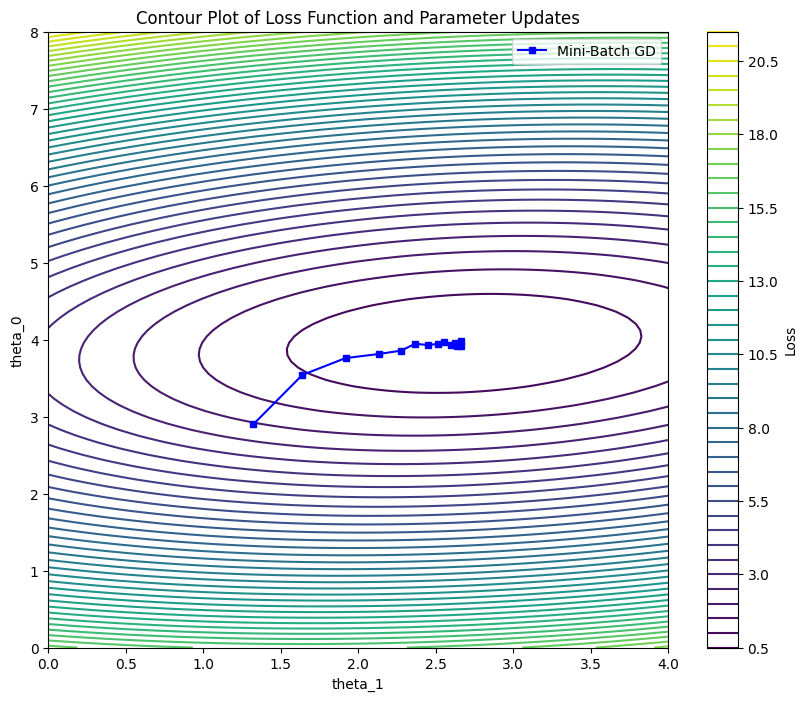

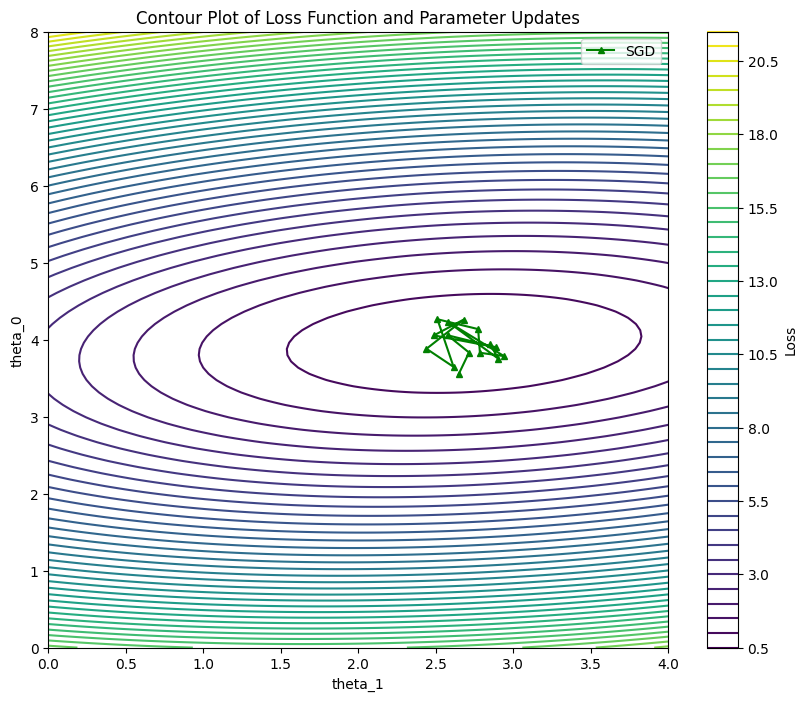

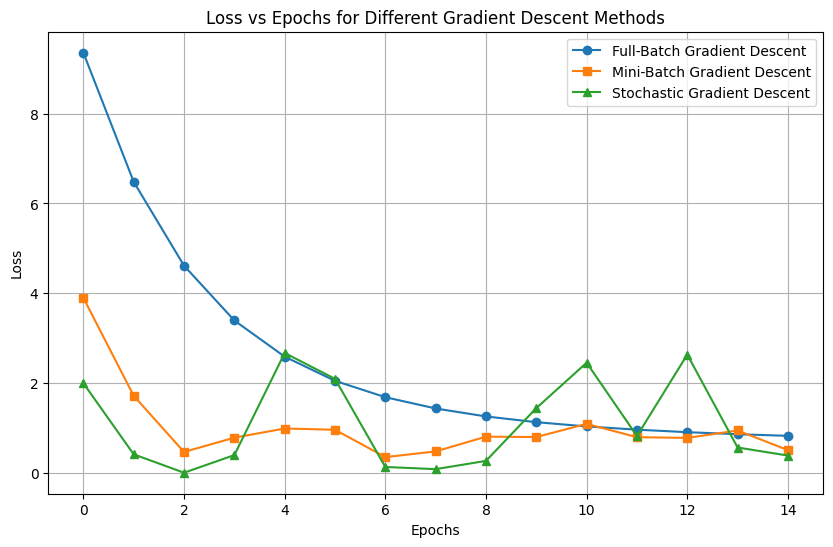

In [19]:
theta_1_full = torch.tensor(1.0, requires_grad=True)
theta_0_full = torch.tensor(1.0, requires_grad=True)

theta_1_mini = torch.tensor(1.0, requires_grad=True)
theta_0_mini = torch.tensor(1.0, requires_grad=True)

theta_1_sgd = torch.tensor(1.0, requires_grad=True)
theta_0_sgd = torch.tensor(1.0, requires_grad=True)

# Store loss and parameter values for each method
full_batch_results = list(full_batch_gd(theta_1_full, theta_0_full))
mini_batch_results = list(mini_batch_gd(theta_1_mini, theta_0_mini))
sgd_results = list(sgd(theta_1_sgd, theta_0_sgd))

# Unpack results
full_batch_theta_1, full_batch_theta_0, full_batch_loss = zip(*full_batch_results)
mini_batch_theta_1, mini_batch_theta_0, mini_batch_loss = zip(*mini_batch_results)
sgd_theta_1, sgd_theta_0, sgd_loss = zip(*sgd_results)

# Grid of (θ1, θ0) values for contour plot
theta_1_range = np.linspace(0, 4, 100)
theta_0_range = np.linspace(0, 8, 100)
theta_1_grid, theta_0_grid = np.meshgrid(theta_1_range, theta_0_range)

# Compute the loss for each (θ1, θ0) pair
loss_grid = np.zeros_like(theta_1_grid)
for i in range(len(theta_1_range)):
    for j in range(len(theta_0_range)):
        pred_grid = theta_1_range[i] * x1 + theta_0_range[j]
        loss_grid[j, i] = np.mean((pred_grid - y) ** 2)

# Plot the contour for the loss function
plt.figure(figsize=(10, 8))
plt.contour(theta_1_grid, theta_0_grid, loss_grid, levels=50, cmap='viridis')
plt.plot(full_batch_theta_1, full_batch_theta_0, 'r-o', label='Full-Batch GD', markersize=4)
plt.colorbar(label='Loss')
plt.xlabel('theta_1')
plt.ylabel('theta_0')
plt.title('Contour Plot of Loss Function and Parameter Updates')
plt.legend()
plt.grid(False)
plt.show()


# Plot the contour for the loss function
plt.figure(figsize=(10, 8))
plt.contour(theta_1_grid, theta_0_grid, loss_grid, levels=50, cmap='viridis')
plt.plot(mini_batch_theta_1, mini_batch_theta_0, 'b-s', label='Mini-Batch GD', markersize=4)
plt.colorbar(label='Loss')
plt.xlabel('theta_1')
plt.ylabel('theta_0')
plt.title('Contour Plot of Loss Function and Parameter Updates')
plt.legend()
plt.grid(False)
plt.show()


# Plot the contour for the loss function
plt.figure(figsize=(10, 8))
plt.contour(theta_1_grid, theta_0_grid, loss_grid, levels=50, cmap='viridis')
plt.plot(sgd_theta_1, sgd_theta_0, 'g-^', label='SGD', markersize=4)
plt.colorbar(label='Loss')
plt.xlabel('theta_1')
plt.ylabel('theta_0')
plt.title('Contour Plot of Loss Function and Parameter Updates')
plt.legend()
plt.grid(False)
plt.show()


# Plot parameter updates
# plt.plot(full_batch_theta_1, full_batch_theta_0, 'r-o', label='Full-Batch GD', markersize=4)
# plt.plot(mini_batch_theta_1, mini_batch_theta_0, 'b-s', label='Mini-Batch GD', markersize=4)
# plt.plot(sgd_theta_1, sgd_theta_0, 'g-^', label='SGD', markersize=4)

# # Add labels and title
# plt.xlabel('theta_1')
# plt.ylabel('theta_0')
# plt.title('Contour Plot of Loss Function and Parameter Updates')
# plt.legend()
# plt.grid(False)
# plt.show()

# Plot Loss vs Epochs for each method
plt.figure(figsize=(10, 6))
plt.plot(full_batch_loss, label='Full-Batch Gradient Descent', marker='o')
plt.plot(mini_batch_loss, label='Mini-Batch Gradient Descent', marker='s')
plt.plot(sgd_loss, label='Stochastic Gradient Descent', marker='^')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs for Different Gradient Descent Methods')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
momentum_coeff = 0.9  # Momentum factor β

In [21]:
def momentum_full_batch(theta_1, theta_0):
    v1, v0 = 0, 0  # Initialize momentum terms
    for epoch in range(num_epochs):
        pred = model(x_tensor, theta_1, theta_0)
        loss = loss_fn(pred, y_tensor)
        loss.backward()

        # Update momentum terms
        v1 = momentum_coeff * v1 + (1 - momentum_coeff) * theta_1.grad
        v0 = momentum_coeff * v0 + (1 - momentum_coeff) * theta_0.grad

        # Update parameters using momentum
        with torch.no_grad():
            theta_1 -= learning_rate * v1
            theta_0 -= learning_rate * v0

        # Zero gradients
        theta_1.grad.zero_()
        theta_0.grad.zero_()

        yield theta_1.item(), theta_0.item(), loss.item(), v1.item(), v0.item()

In [22]:

# Momentum gradient descent for Stochastic GD
def momentum_sgd(theta_1, theta_0):
    v1, v0 = 0, 0  # Initialize momentum terms
    for epoch in range(num_epochs):
        indices = torch.randperm(num_samples)
        for i in range(num_samples):
            idx = indices[i]
            single_x = x_tensor[idx].view(-1, 1)
            single_y = y_tensor[idx].view(-1, 1)
            pred = model(single_x, theta_1, theta_0)
            loss = loss_fn(pred, single_y)
            loss.backward()

            # Update momentum terms
            v1 = momentum_coeff * v1 + (1 - momentum_coeff) * theta_1.grad
            v0 = momentum_coeff * v0 + (1 - momentum_coeff) * theta_0.grad

            # Update parameters using momentum
            with torch.no_grad():
                theta_1 -= learning_rate * v1
                theta_0 -= learning_rate * v0

            # Zero gradients
            theta_1.grad.zero_()
            theta_0.grad.zero_()

        yield theta_1.item(), theta_0.item(), loss.item(), v1.item(), v0.item()

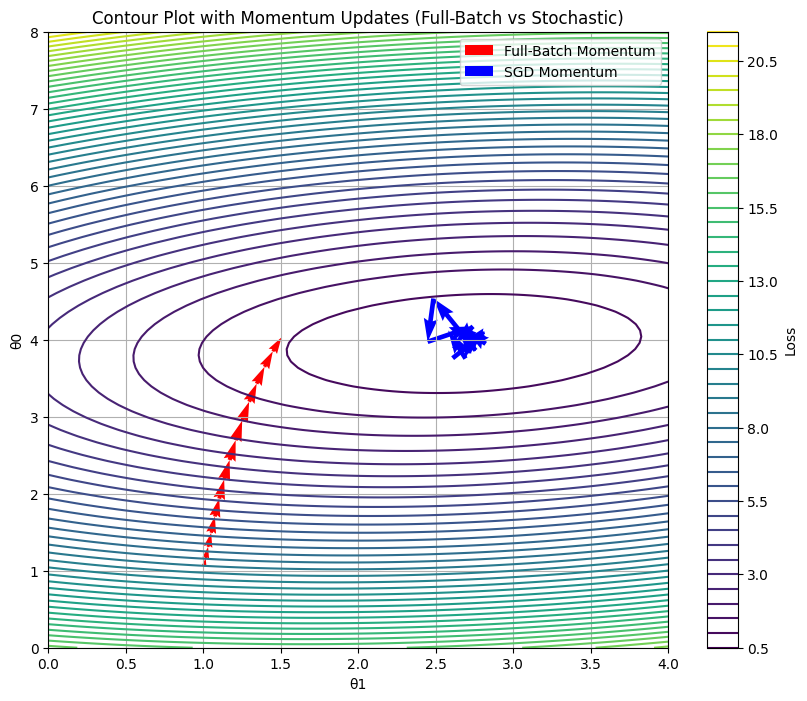

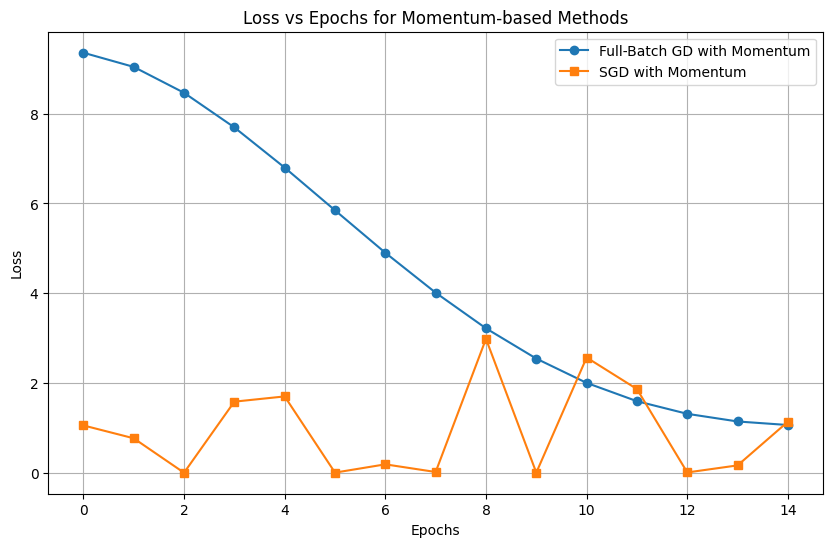

In [23]:
theta_1_full = torch.tensor(1.0, requires_grad=True)
theta_0_full = torch.tensor(1.0, requires_grad=True)

theta_1_sgd = torch.tensor(1.0, requires_grad=True)
theta_0_sgd = torch.tensor(1.0, requires_grad=True)

# Store loss and parameter values for both methods with momentum
full_batch_momentum_results = list(momentum_full_batch(theta_1_full, theta_0_full))
sgd_momentum_results = list(momentum_sgd(theta_1_sgd, theta_0_sgd))

# Unpack results
full_batch_theta_1, full_batch_theta_0, full_batch_loss, full_batch_v1, full_batch_v0 = zip(*full_batch_momentum_results)
sgd_theta_1, sgd_theta_0, sgd_loss, sgd_v1, sgd_v0 = zip(*sgd_momentum_results)

# Grid of (θ1, θ0) values for contour plot
theta_1_range = np.linspace(0, 4, 100)
theta_0_range = np.linspace(0, 8, 100)
theta_1_grid, theta_0_grid = np.meshgrid(theta_1_range, theta_0_range)

# Compute the loss for each (θ1, θ0) pair
loss_grid = np.zeros_like(theta_1_grid)
for i in range(len(theta_1_range)):
    for j in range(len(theta_0_range)):
        pred_grid = theta_1_range[i] * x1 + theta_0_range[j]
        loss_grid[j, i] = np.mean((pred_grid - y) ** 2)

# Plot the contour for the loss function
plt.figure(figsize=(10, 8))
plt.contour(theta_1_grid, theta_0_grid, loss_grid, levels=50, cmap='viridis')
plt.colorbar(label='Loss')

# Plot parameter updates and momentum vectors for full-batch momentum
plt.quiver(full_batch_theta_1[:-1], full_batch_theta_0[:-1], 
           np.array(full_batch_theta_1[1:]) - np.array(full_batch_theta_1[:-1]),
           np.array(full_batch_theta_0[1:]) - np.array(full_batch_theta_0[:-1]),
           scale_units='xy', angles='xy', scale=1, color='r', label='Full-Batch Momentum')

# Plot parameter updates and momentum vectors for stochastic momentum
plt.quiver(sgd_theta_1[:-1], sgd_theta_0[:-1], 
           np.array(sgd_theta_1[1:]) - np.array(sgd_theta_1[:-1]),
           np.array(sgd_theta_0[1:]) - np.array(sgd_theta_0[:-1]),
           scale_units='xy', angles='xy', scale=1, color='b', label='SGD Momentum')

# Add labels and title
plt.xlabel('θ1')
plt.ylabel('θ0')
plt.title('Contour Plot with Momentum Updates (Full-Batch vs Stochastic)')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss vs Epochs for both momentum methods
plt.figure(figsize=(10, 6))
plt.plot(full_batch_loss, label='Full-Batch GD with Momentum', marker='o')
plt.plot(sgd_loss, label='SGD with Momentum', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs for Momentum-based Methods')
plt.legend()
plt.grid(True)
plt.show()